### Project description:
+ Finding SMA Crossover Strategy

In [15]:
# project dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests 
from collections import Counter
plt.style.use('fivethirtyeight')

In [31]:
# Creating first test case by initiating the first dataframe for UCO

# URL >> https://query1.finance.yahoo.com/v8/finance/chart/{$symbol}?range={$range}&interval={$interval}
# symbol >> the stock ticker symbol, e.g. AAPL for Apple
# range >> the desired range of the query, allowed parameters are [1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max]
# interval >> the desired interval of the quote, e.g. every 5 minutes, allowed parameters are [1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo]

ENDPOINT = "https://query1.finance.yahoo.com/v8/finance/chart/"

# Stock symbol
symbol = ["AAPL","TSLA"]
def createURL(sym, ran, inter):
    return ENDPOINT+sym+"?"+"range="+ran+"&interval="+inter


In [32]:
# Fetching data
url = createURL(symbol[0], "6mo", "1d")
req = requests.get(url).json()
_rawcolumn_names = list(req['chart']['result'][0])
values = req['chart']['result'][0][_rawcolumn_names[2]]['quote'][0]
cols = list(values.keys())



In [18]:
# Create Dataframe 
df = pd.DataFrame(columns=cols)
df[cols[0]] = values['high']
df[cols[1]] = values['open']
df[cols[2]] = values['close']
df[cols[3]] = values['volume']
df[cols[4]] = values['low']


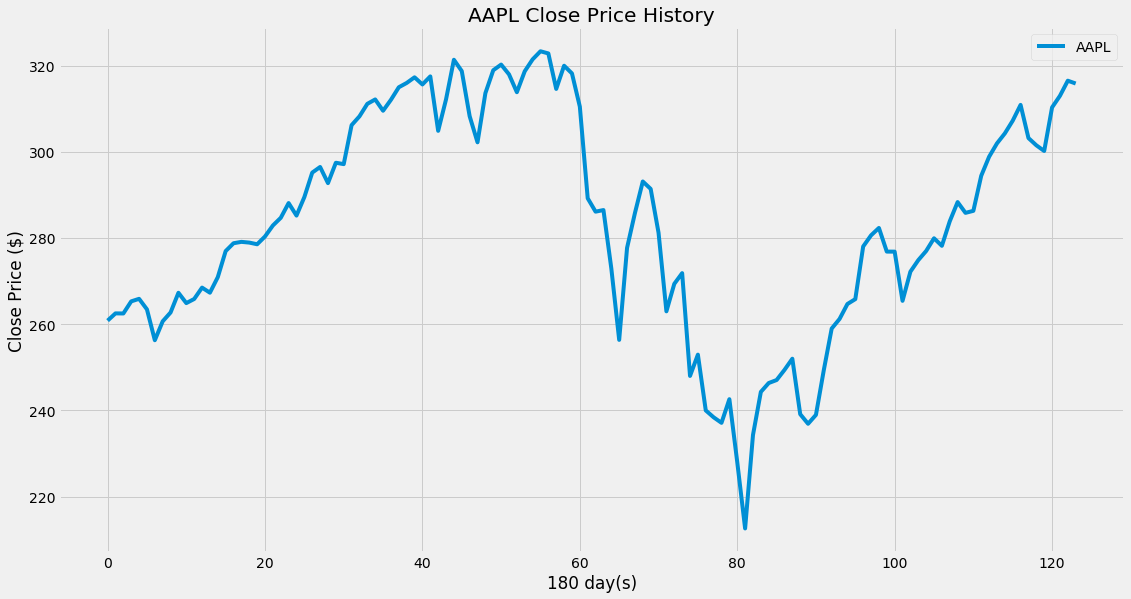

In [19]:
# Plotting the data
plt.figure(figsize=(17, 9))
plt.plot(df['close'], label="AAPL")
plt.title("AAPL Close Price History")
plt.xlabel('180 day(s)')
plt.ylabel('Close Price ($)')
plt.legend(loc="upper right")
plt.show()

In [20]:
# Create the SMA for 9 days

sma_9 = pd.DataFrame()
sma_9['Close Price'] = df['close'].rolling(window= 9).mean()

sma_9

,Close Price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
119,302.521108
120,304.283332
121,305.854445
122,307.471110


In [21]:
# Create the SMA for 14 days

sma_14 = pd.DataFrame()
sma_14['Close Price'] = df['close'].rolling(window= 14).mean()
sma_14

,Close Price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
119,296.092858
120,298.387144
121,300.467143
122,302.479285


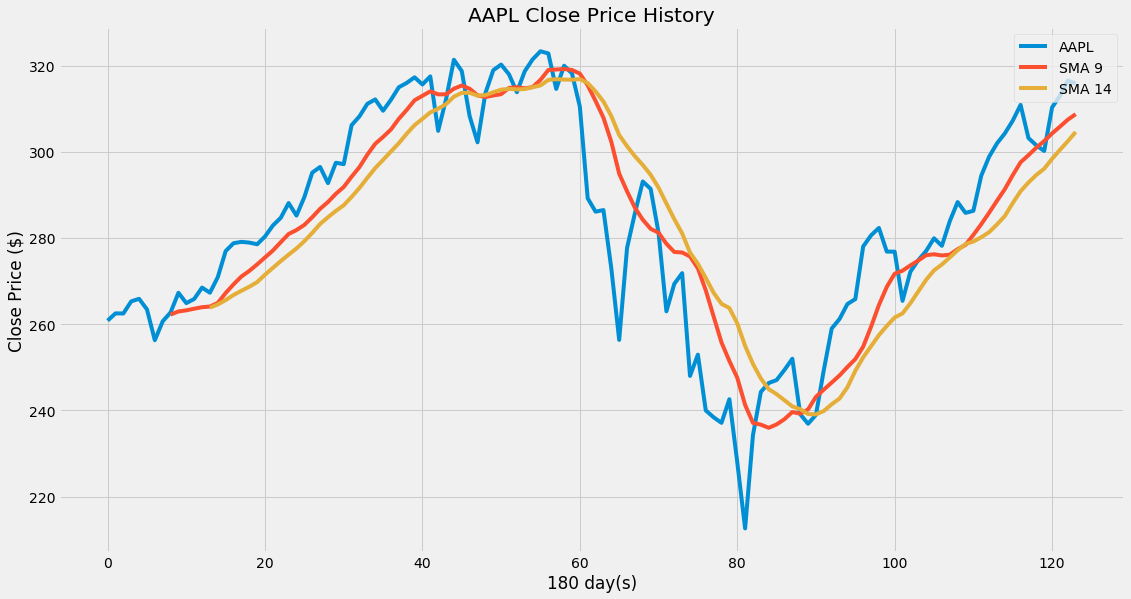

In [22]:
# Plotting the data
plt.figure(figsize=(17, 9))
plt.plot(df['close'], label="AAPL")
plt.plot(sma_9['Close Price'], label="SMA 9")
plt.plot(sma_14['Close Price'], label="SMA 14")
plt.title("AAPL Close Price History")
plt.xlabel('180 day(s)')
plt.ylabel('Close Price ($)')
plt.legend(loc='upper right')
plt.show()

In [23]:
# Merging all the columns into one table
data = pd.DataFrame()
data['AAPL'] = df['close']
data['SMA 9'] = sma_9['Close Price']
data['SMA 14'] = sma_14['Close Price']
data

,AAPL,SMA 9,SMA 14
0,260.839996,NaN,NaN
1,262.519989,NaN,NaN
2,262.500000,NaN,NaN
3,265.309998,NaN,NaN
4,265.899994,NaN,NaN
...,...,...,...
119,300.209991,302.521108,296.092858
120,310.320007,304.283332,298.387144
121,313.010010,305.854445,300.467143
122,316.519989,307.471110,302.479285


In [24]:
# Creating the signal when to buy and sell the stock

def create_signal(data):
    buy_sig_price = []
    sell_sig_price = []
    flag = -1
    
    for i in range(len(data)):
        if data['SMA 9'][i] > data['SMA 14'][i]:
            
            if flag != 1:
                
                buy_sig_price.append(data["AAPL"][i])
                sell_sig_price.append(np.nan)
                flag = 1
                
            else:
                buy_sig_price.append(np.nan)
                sell_sig_price.append(np.nan)
                
        elif data['SMA 9'][i] < data['SMA 14'][i]:
            
            if flag != 0:
                    
                buy_sig_price.append(np.nan)
                sell_sig_price.append(data["AAPL"][i])
                flag = 0
                
            else:
                
                buy_sig_price.append(np.nan)
                sell_sig_price.append(np.nan)
                
        else:
            
            buy_sig_price.append(np.nan)
            sell_sig_price.append(np.nan)
                
    return (buy_sig_price, sell_sig_price)

In [25]:
# Storing values into a variable

buy_sell = create_signal(data)
data["Buy Signal Price"] = buy_sell[0]
data["Sell Signal Price"] = buy_sell[1]

#show data
data

,AAPL,SMA 9,SMA 14,Buy Signal Price,Sell Signal Price
0,260.839996,NaN,NaN,NaN,NaN
1,262.519989,NaN,NaN,NaN,NaN
2,262.500000,NaN,NaN,NaN,NaN
3,265.309998,NaN,NaN,NaN,NaN
4,265.899994,NaN,NaN,NaN,NaN
...,...,...,...,...,...
119,300.209991,302.521108,296.092858,NaN,NaN
120,310.320007,304.283332,298.387144,NaN,NaN
121,313.010010,305.854445,300.467143,NaN,NaN
122,316.519989,307.471110,302.479285,NaN,NaN


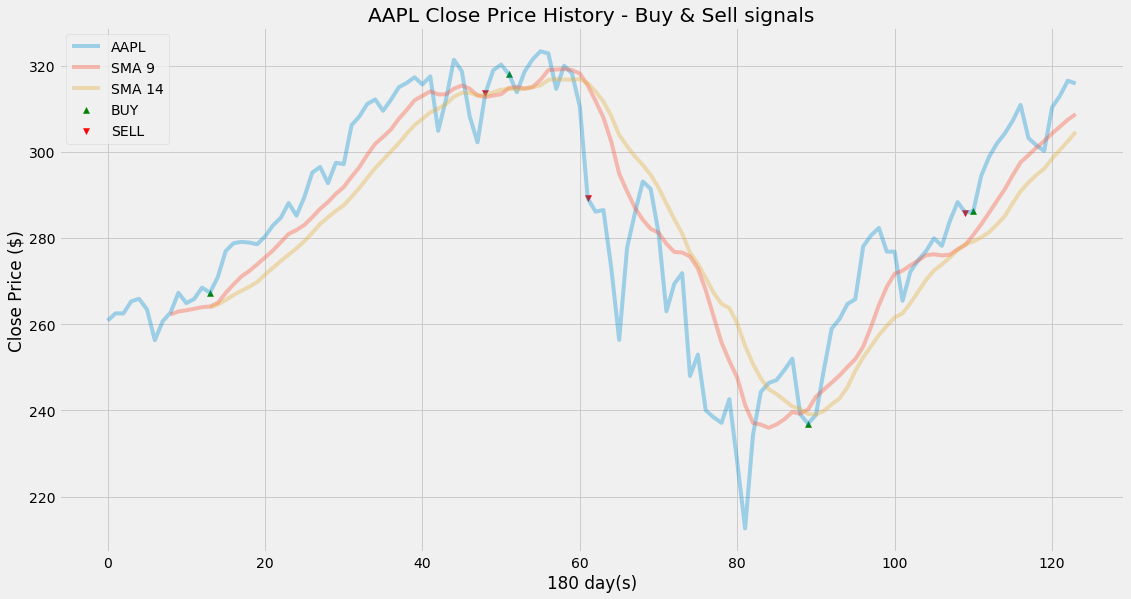

In [26]:
# Plotting the data
plt.figure(figsize=(17, 9))
plt.plot(data['AAPL'], label="AAPL", alpha=.35)
plt.plot(data['SMA 9'], label="SMA 9", alpha=.35)
plt.plot(data['SMA 14'], label="SMA 14", alpha=.35)
plt.scatter(data.index, data['Buy Signal Price'], label="BUY", marker="^", color='green')
plt.scatter(data.index, data['Sell Signal Price'], label="SELL", marker="v", color='red')
plt.title("AAPL Close Price History - Buy & Sell signals")
plt.xlabel('180 day(s)')
plt.ylabel('Close Price ($)')
plt.legend(loc='upper left')
plt.show()

In [34]:
url = createURL(symbol[1], "6mo", "1d")
req = requests.get(url).json()
_rawcolumn_names = list(req['chart']['result'][0])
values = req['chart']['result'][0][_rawcolumn_names[2]]['quote'][0]
cols = list(values.keys())

In [35]:
# Create Dataframe 
df = pd.DataFrame(columns=cols)
df[cols[0]] = values['high']
df[cols[1]] = values['open']
df[cols[2]] = values['close']
df[cols[3]] = values['volume']
df[cols[4]] = values['low']


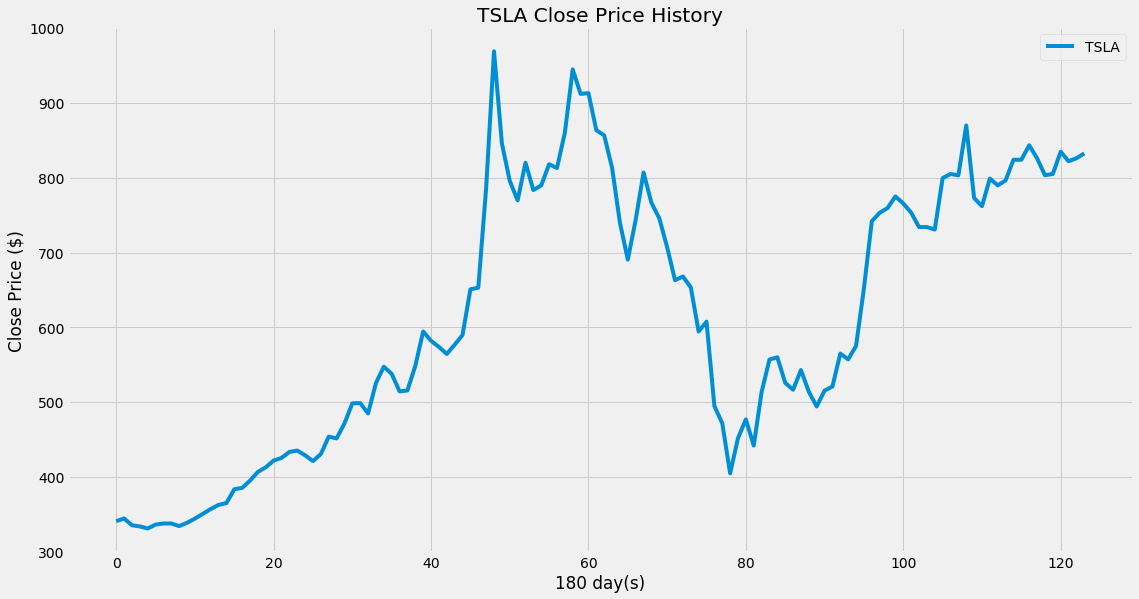

In [36]:
# Plotting the data
plt.figure(figsize=(17, 9))
plt.plot(df['close'], label="TSLA")
plt.title("TSLA Close Price History")
plt.xlabel('180 day(s)')
plt.ylabel('Close Price ($)')
plt.legend(loc="upper right")
plt.show()

In [37]:
# Create the SMA for 9 days

sma_9 = pd.DataFrame()
sma_9['Close Price'] = df['close'].rolling(window= 9).mean()

sma_9

,Close Price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
119,812.313327
120,816.291104
121,819.876662
122,823.165548


In [51]:
# Create the SMA for 14 days

sma_14 = pd.DataFrame()
sma_14['Close Price'] = df['close'].rolling(window= 14).mean()
sma_14

,Close Price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
119,657.955101
120,662.082201
121,666.048201
122,669.973401


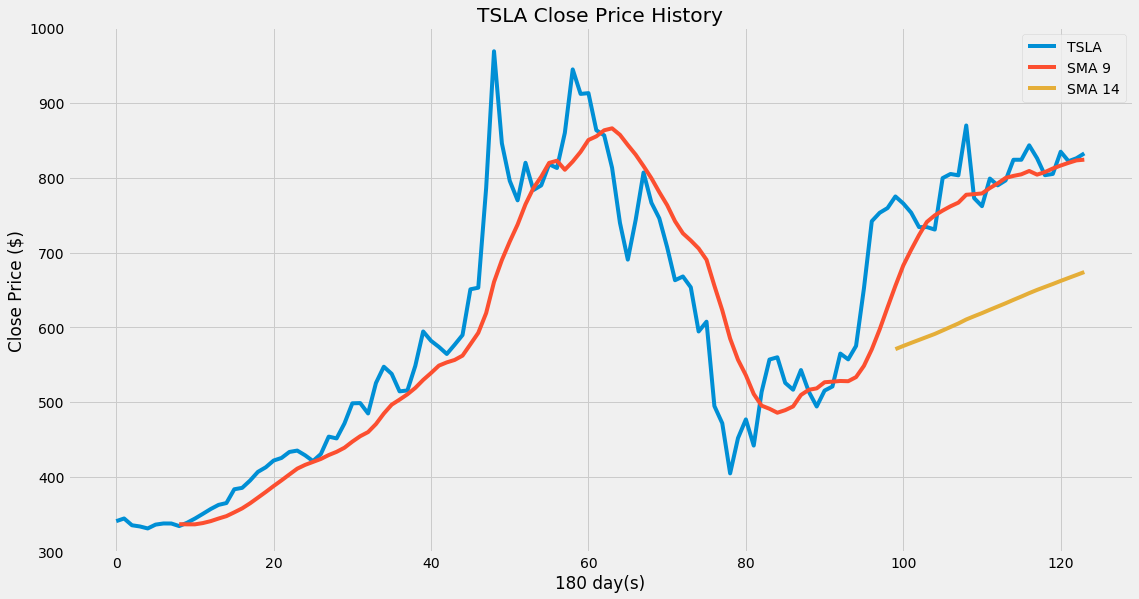

In [52]:
# Plotting the data
plt.figure(figsize=(17, 9))
plt.plot(df['close'], label="TSLA")
plt.plot(sma_9['Close Price'], label="SMA 9")
plt.plot(sma_14['Close Price'], label="SMA 14")
plt.title("TSLA Close Price History")
plt.xlabel('180 day(s)')
plt.ylabel('Close Price ($)')
plt.legend(loc='upper right')
plt.show()

In [53]:
# Merging all the columns into one table
data = pd.DataFrame()
data['TSLA'] = df['close']
data['SMA 9'] = sma_9['Close Price']
data['SMA 14'] = sma_14['Close Price']
data

,TSLA,SMA 9,SMA 14
0,341.000000,NaN,NaN
1,344.570007,NaN,NaN
2,335.500000,NaN,NaN
3,333.929993,NaN,NaN
4,331.260010,NaN,NaN
...,...,...,...
119,805.049988,812.313327,657.955101
120,834.719971,816.291104,662.082201
121,822.070007,819.876662,666.048201
122,826.000000,823.165548,669.973401


In [54]:
# Creating the signal when to buy and sell the stock

def create_signal(data):
    buy_sig_price = []
    sell_sig_price = []
    flag = -1
    
    for i in range(len(data)):
        if data['SMA 9'][i] > data['SMA 14'][i]:
            
            if flag != 1:
                
                buy_sig_price.append(data["TSLA"][i])
                sell_sig_price.append(np.nan)
                flag = 1
                
            else:
                buy_sig_price.append(np.nan)
                sell_sig_price.append(np.nan)
                
        elif data['SMA 9'][i] < data['SMA 14'][i]:
            
            if flag != 0:
                    
                buy_sig_price.append(np.nan)
                sell_sig_price.append(data["TSLA"][i])
                flag = 0
                
            else:
                
                buy_sig_price.append(np.nan)
                sell_sig_price.append(np.nan)
                
        else:
            
            buy_sig_price.append(np.nan)
            sell_sig_price.append(np.nan)
                
    return (buy_sig_price, sell_sig_price)

In [55]:
# Storing values into a variable

buy_sell = create_signal(Tesla_data)
data["Buy Signal Price"] = buy_sell[0]
data["Sell Signal Price"] = buy_sell[1]

#show data
data

,TSLA,SMA 9,SMA 14,Buy Signal Price,Sell Signal Price
0,341.000000,NaN,NaN,NaN,NaN
1,344.570007,NaN,NaN,NaN,NaN
2,335.500000,NaN,NaN,NaN,NaN
3,333.929993,NaN,NaN,NaN,NaN
4,331.260010,NaN,NaN,NaN,NaN
...,...,...,...,...,...
119,805.049988,812.313327,657.955101,805.049988,NaN
120,834.719971,816.291104,662.082201,NaN,NaN
121,822.070007,819.876662,666.048201,NaN,NaN
122,826.000000,823.165548,669.973401,NaN,NaN


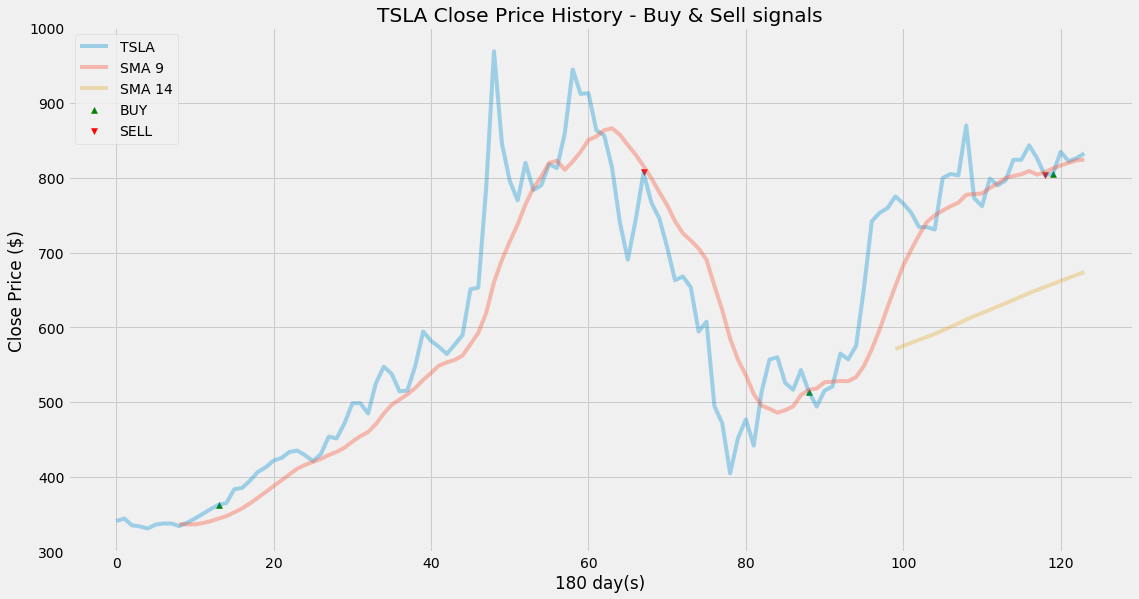

In [56]:
# Plotting the data
plt.figure(figsize=(17, 9))
plt.plot(data['TSLA'], label="TSLA", alpha=.35)
plt.plot(data['SMA 9'], label="SMA 9", alpha=.35)
plt.plot(data['SMA 14'], label="SMA 14", alpha=.35)
plt.scatter(data.index, data['Buy Signal Price'], label="BUY", marker="^", color='green')
plt.scatter(data.index, data['Sell Signal Price'], label="SELL", marker="v", color='red')
plt.title("TSLA Close Price History - Buy & Sell signals")
plt.xlabel('180 day(s)')
plt.ylabel('Close Price ($)')
plt.legend(loc='upper left')
plt.show()